In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Define column names
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

# Load training data
train_data = pd.read_csv("adult.data", header=None, names=column_names, na_values=" ?", skipinitialspace=True)

# Load test data
test_data = pd.read_csv("adult.test", header=None, names=column_names, na_values=" ?", skipinitialspace=True, skipfooter=1)

# Display the first 5 rows of training data
train_data.head()

<ipython-input-2-b3b2ebb82046>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv("adult.test", header=None, names=column_names, na_values=" ?", skipinitialspace=True, skipfooter=1)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Check for missing values in training data
print("Missing values in training data:")
print(train_data.isnull().sum())

Missing values in training data:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [4]:
# Check for missing values in test data
print("Missing values in test data:")
print(test_data.isnull().sum())

Missing values in test data:
age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital-loss      1
hours-per-week    1
native-country    1
income            1
dtype: int64


In [5]:
# Display the last few rows of the test data
print(test_data.tail())

      age     workclass    fnlwgt  education  education-num  \
16277  39       Private  215419.0  Bachelors           13.0   
16278  64             ?  321403.0    HS-grad            9.0   
16279  38       Private  374983.0  Bachelors           13.0   
16280  44       Private   83891.0  Bachelors           13.0   
16281  35  Self-emp-inc  182148.0  Bachelors           13.0   

           marital-status       occupation    relationship  \
16277            Divorced   Prof-specialty   Not-in-family   
16278             Widowed                ?  Other-relative   
16279  Married-civ-spouse   Prof-specialty         Husband   
16280            Divorced     Adm-clerical       Own-child   
16281  Married-civ-spouse  Exec-managerial         Husband   

                     race     sex  capital-gain  capital-loss  hours-per-week  \
16277               White  Female           0.0           0.0            36.0   
16278               Black    Male           0.0           0.0            40.0   
16279

In [6]:
# Find rows with missing values
rows_with_missing_values = test_data[test_data.isnull().any(axis=1)]

# Display rows with missing values
print(rows_with_missing_values)

                    age workclass  fnlwgt education  education-num  \
0  |1x3 Cross validator      None     NaN      None            NaN   

  marital-status occupation relationship  race   sex  capital-gain  \
0           None       None         None  None  None           NaN   

   capital-loss  hours-per-week native-country income  
0           NaN             NaN           None   None  


In [7]:
# Drop the corrupted row
test_data = test_data.drop(0)

# Verify the row is removed
print("Missing values after handling:")
print(test_data.isnull().sum())

Missing values after handling:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [8]:
test_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [9]:
# Clean the target variable in test data
test_data["income"] = test_data["income"].str.rstrip(".")

# Verify the target variable
print(test_data["income"].unique())

['<=50K' '>50K']


In [10]:
# Display the first 5 rows of the cleaned test data
print(test_data.head())

  age  workclass    fnlwgt     education  education-num      marital-status  \
1  25    Private  226802.0          11th            7.0       Never-married   
2  38    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
3  28  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
4  44    Private  160323.0  Some-college           10.0  Married-civ-spouse   
5  18          ?  103497.0  Some-college           10.0       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
1  Machine-op-inspct    Own-child  Black    Male           0.0           0.0   
2    Farming-fishing      Husband  White    Male           0.0           0.0   
3    Protective-serv      Husband  White    Male           0.0           0.0   
4  Machine-op-inspct      Husband  Black    Male        7688.0           0.0   
5                  ?    Own-child  White  Female           0.0           0.0   

   hours-per-week native-country income  
1 

In [11]:
# Combine training and test data
combined_data = pd.concat([train_data, test_data])

# Display the shape of the combined data
print("Combined data shape:", combined_data.shape)

Combined data shape: (48842, 15)


In [12]:
# Perform one-hot encoding
combined_data = pd.get_dummies(combined_data, drop_first=True)

# Display the first 5 rows after encoding
print(combined_data.head())

     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0   77516.0           13.0        2174.0           0.0            40.0   
1   83311.0           13.0           0.0           0.0            13.0   
2  215646.0            9.0           0.0           0.0            40.0   
3  234721.0            7.0           0.0           0.0            40.0   
4  338409.0           13.0           0.0           0.0            40.0   

   age_18  age_19  age_20  age_21  age_22  ...  native-country_Puerto-Rico  \
0   False   False   False   False   False  ...                       False   
1   False   False   False   False   False  ...                       False   
2   False   False   False   False   False  ...                       False   
3   False   False   False   False   False  ...                       False   
4   False   False   False   False   False  ...                       False   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0          

In [13]:
# Check data types of the first few columns
print(combined_data.dtypes)

fnlwgt                            float64
education-num                     float64
capital-gain                      float64
capital-loss                      float64
hours-per-week                    float64
                                   ...   
native-country_Trinadad&Tobago       bool
native-country_United-States         bool
native-country_Vietnam               bool
native-country_Yugoslavia            bool
income_>50K                          bool
Length: 245, dtype: object


In [14]:
# Convert boolean columns to binary (1/0)
combined_data = combined_data.astype(int)

# Display the first 5 rows after conversion
print(combined_data.head())

   fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  age_18  \
0   77516             13          2174             0              40       0   
1   83311             13             0             0              13       0   
2  215646              9             0             0              40       0   
3  234721              7             0             0              40       0   
4  338409             13             0             0              40       0   

   age_19  age_20  age_21  age_22  ...  native-country_Puerto-Rico  \
0       0       0       0       0  ...                           0   
1       0       0       0       0  ...                           0   
2       0       0       0       0  ...                           0   
3       0       0       0       0  ...                           0   
4       0       0       0       0  ...                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                      

In [15]:
# Split back into training and test data
train_data = combined_data[:len(train_data)]
test_data = combined_data[len(train_data):]

# Display the shapes of the splits
print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

Training data shape: (32561, 245)
Test data shape: (16281, 245)


In [16]:
# Separate features and target for training data
X_train = train_data.drop("income_>50K", axis=1)
y_train = train_data["income_>50K"]

# Separate features and target for test data
X_test = test_data.drop("income_>50K", axis=1)
y_test = test_data["income_>50K"]

# Display the shapes of the splits
print("Training data shapes:", X_train.shape, y_train.shape)
print("Test data shapes:", X_test.shape, y_test.shape)

Training data shapes: (32561, 244) (32561,)
Test data shapes: (16281, 244) (16281,)


In [17]:
# Check the distribution of the target variable in training data
print("Training target distribution:")
print(y_train.value_counts(normalize=True))

# Check the distribution of the target variable in test data
print("Test target distribution:")
print(y_test.value_counts(normalize=True))

Training target distribution:
income_>50K
0    0.75919
1    0.24081
Name: proportion, dtype: float64
Test target distribution:
income_>50K
0    0.763774
1    0.236226
Name: proportion, dtype: float64


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.86


In [19]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display the top 20 features
print(feature_importance_df.head(20))

                               Feature  Importance
0                               fnlwgt    0.134907
2                         capital-gain    0.089272
174  marital-status_Married-civ-spouse    0.083608
4                       hours-per-week    0.078688
1                        education-num    0.056436
176       marital-status_Never-married    0.032228
3                         capital-loss    0.028178
182         occupation_Exec-managerial    0.019218
202                           sex_Male    0.018571
193         relationship_Not-in-family    0.018071
188          occupation_Prof-specialty    0.013946
166                education_Bachelors    0.013598
195             relationship_Own-child    0.013024
153                  workclass_Private    0.011852
169                  education_Masters    0.010011
197                  relationship_Wife    0.009040
186           occupation_Other-service    0.008693
168                  education_HS-grad    0.008337
196             relationship_Un

In [20]:
# Select top 20 features
top_features = feature_importance_df.head(20)["Feature"].tolist()

# Filter the dataset to include only top features
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Display the shapes of the reduced datasets
print("X_train_reduced shape:", X_train_reduced.shape)
print("X_test_reduced shape:", X_test_reduced.shape)

X_train_reduced shape: (32561, 20)
X_test_reduced shape: (16281, 20)


In [21]:
# Retrain the model on reduced features
model_reduced = RandomForestClassifier(random_state=42)
model_reduced.fit(X_train_reduced, y_train)

# Evaluate the model on the reduced test set
accuracy_reduced = model_reduced.score(X_test_reduced, y_test)
print(f"Model accuracy (reduced features): {accuracy_reduced:.2f}")

Model accuracy (reduced features): 0.83


In [22]:
pip install shap

In [23]:
import shap

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(model_reduced, feature_perturbation='interventional')

# Calculate SHAP values for a subset
X_test_subset = X_test_reduced[:100]
shap_values = explainer.shap_values(X_test_subset)

# Display SHAP values for the first prediction
print(shap_values[0])

[[-0.00048578  0.00048578]
 [ 0.02135649 -0.02135649]
 [ 0.06248583 -0.06248583]
 [ 0.01475735 -0.01475735]
 [ 0.04934143 -0.04934143]
 [ 0.03922584 -0.03922584]
 [ 0.00480499 -0.00480499]
 [ 0.00761903 -0.00761903]
 [-0.00671655  0.00671655]
 [ 0.0028163  -0.0028163 ]
 [ 0.00681135 -0.00681135]
 [ 0.00388855 -0.00388855]
 [ 0.03354037 -0.03354037]
 [ 0.00193944 -0.00193944]
 [ 0.00140905 -0.00140905]
 [ 0.00255537 -0.00255537]
 [-0.00144627  0.00144627]
 [-0.00159387  0.00159387]
 [-0.0003263   0.0003263 ]
 [-0.00101615  0.00101615]]


In [25]:
import numpy as np

# Check the shape of shap_values
if isinstance(shap_values, list):
    print("shap_values is a list of arrays.")
    for i, arr in enumerate(shap_values):
        print(f"Shape of shap_values[{i}]:", arr.shape)
else:
    print("Shape of shap_values:", np.array(shap_values).shape)

Shape of shap_values: (100, 20, 2)


In [26]:
# Check the shape of X_test_subset
print("X_test_subset shape:", X_test_subset.shape)

X_test_subset shape: (100, 20)


In [27]:
import shap

# Step 1: Select SHAP values for the positive class
shap_values_class1 = shap_values[:, :, 1]  # Shape: (100, 20)

# Step 2: Verify the shape
print("Shape of shap_values_class1:", shap_values_class1.shape)

# Step 3: Plot the force plot
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values_class1[0, :], X_test_subset.iloc[0, :])

Shape of shap_values_class1: (100, 20)


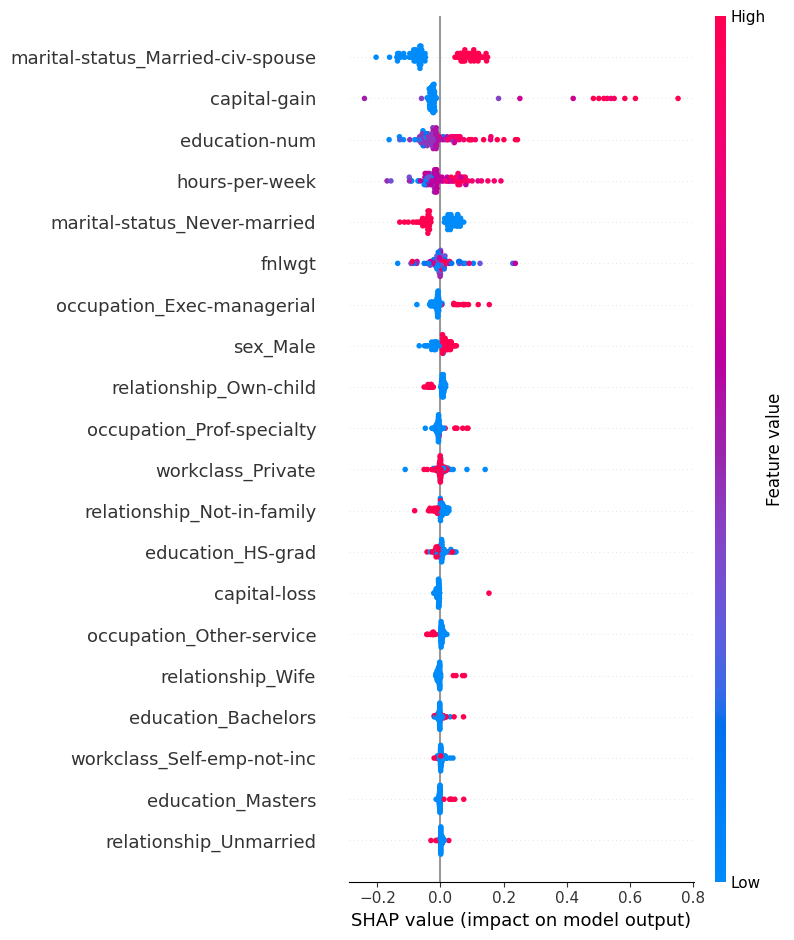

In [28]:
# Plot the SHAP summary plot
shap.summary_plot(shap_values_class1, X_test_subset)

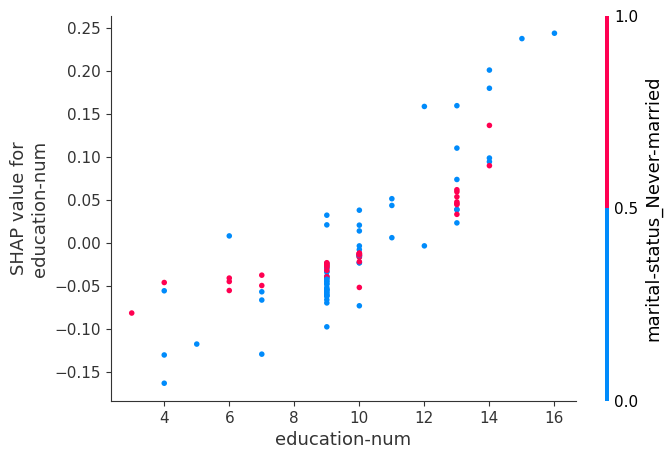

In [29]:
# Plot the dependence plot for a specific feature (e.g., education-num)
shap.dependence_plot("education-num", shap_values_class1, X_test_subset)

In [30]:
# Save the force plot as an HTML file
shap.save_html("force_plot.html", shap.force_plot(explainer.expected_value[1], shap_values_class1[0, :], X_test_subset.iloc[0, :]))